# Toronto anomalies analysis
Anomalies detection and performance measurement

### Importing necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import utils
import os.path

### Loading the data

In [13]:
SITE = 7879
channels = pd.read_csv('../dataset/channels.csv')
channels[channels.siteId == SITE].head()

,siteId,channelId,channelName,units,isCalculated
81434,7879,11723,MP1 BTYVOLT,V,False
81435,7879,11722,MP1 UpDEPTH_1,mm,False
81436,7879,11721,MP1 UNIDEPTH,mm,False
81437,7879,11720,MP1 RAWVEL,m/s,False
81438,7879,11719,MP1 PEAKVEL_1,m/s,False


### Assigning the channelId value to variable

In [14]:
q_raw = 14851
mp1_q_final = 11726
mp1_q_interim = 19495
mp1_flow = 11717

### Using utils to load the values from chosen channels

In [15]:
q_raw = utils.load_channel_data(SITE, q_raw).rename('q_raw').fillna(0)
mp1_q_final = utils.load_channel_data(SITE, mp1_q_final).rename('mp1_q_final').fillna(0)
mp1_q_interim = utils.load_channel_data(SITE, mp1_q_interim).rename('mp1_q_interim').fillna(0)
mp1_flow = utils.load_channel_data(SITE, mp1_flow).rename('mp1_flow').fillna(0)

### Short description of the data

In [23]:
mp1_flow.describe()

count    289582.000000
mean        415.658708
std         136.128093
min           0.000000
25%         330.493172
50%         424.960678
75%         481.294640
max        1798.099976
Name: mp1_flow, dtype: float64

In [17]:
mp1_q_final.describe()

count    258943.000000
mean        451.324441
std         133.677782
min          84.080002
25%         363.100006
50%         464.700012
75%         518.299988
max        1798.500000
Name: mp1_q_final, dtype: float64

### Adding the difference between raw and final

In [18]:
df = pd.concat([mp1_flow, mp1_q_final], axis=1).dropna()
df['q_diff'] = np.abs(df.mp1_q_final - df.mp1_flow)
print('Anomalies in q_raw: {:}'.format(len(df[df['q_diff'] > 1])))

Anomalies in q_raw: 195138


### Creating anomalies data frame

In [19]:
anomalies = df[df.q_diff > 1]
anomalies = anomalies.reset_index()
anomalies[['time','mp1_flow','mp1_q_final','q_diff']].head()

,time,mp1_flow,mp1_q_final,q_diff
0,2015-11-01 00:00:00,265.399994,294.399994,29.000000
1,2015-11-01 00:05:00,271.500000,301.100006,29.600006
2,2015-11-01 00:10:00,273.200012,303.000000,29.799988
3,2015-11-01 00:15:00,272.000000,301.600006,29.600006
4,2015-11-01 00:20:00,263.799988,292.600006,28.800018


### Short description of the anomalies data frame

In [20]:
anomalies.describe()

,mp1_flow,mp1_q_final,q_diff
count,195138.000000,195138.000000,195138.000000
mean,390.286177,437.348421,47.453017
std,108.863560,114.836082,44.394441
min,0.000000,138.500000,1.000610
25%,313.200417,353.600006,33.700012
50%,411.403793,459.100006,45.299988
75%,458.257393,510.200012,50.858910
max,1546.854126,1547.900024,865.116013


### Showing the general plot of given data

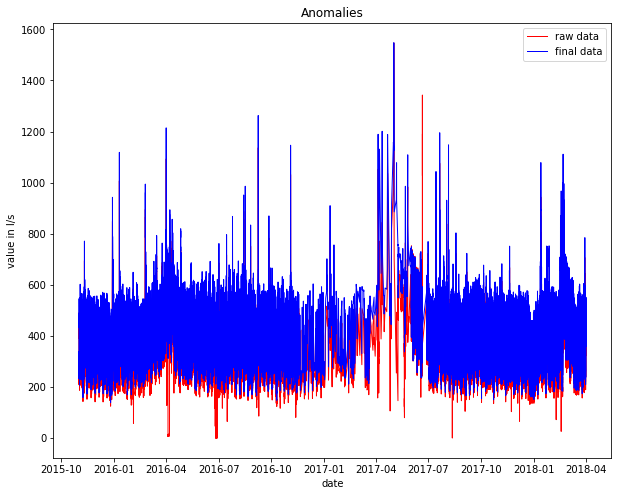

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(anomalies['time'], anomalies['mp1_flow'], color="red",
    label="raw data", linewidth=1)
plt.plot(anomalies['time'], anomalies['mp1_q_final'], c='blue', label="final data",linewidth=1)
plt.xlabel("date")
plt.ylabel("value in l/s")
plt.title("Anomalies")
plt.legend()
plt.show()

### Showing data in a given range

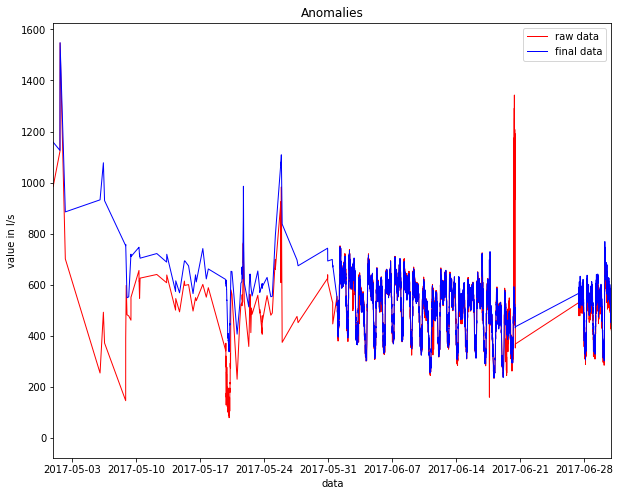

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(anomalies['time'], anomalies['mp1_flow'], color="red",
    label="raw data", linewidth=1)
plt.plot(anomalies['time'], anomalies['mp1_q_final'], c='blue', label="final data",linewidth=1)
plt.xlim(('2017-05-01'),('2017-07-01'))
plt.xlabel("date")
plt.ylabel("value in l/s")
plt.title("Anomalies")
plt.legend()
plt.show()

### Finding anomalies on mp1_flow
Using the moving average method

In [39]:
mp1_flow.head()

time
2015-11-01 00:00:00    265.399994
2015-11-01 00:05:00    271.500000
2015-11-01 00:10:00    273.200012
2015-11-01 00:15:00    272.000000
2015-11-01 00:20:00    263.799988
Name: mp1_flow, dtype: float64

### Outliers detection methods